In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

Cloning into 'SFC-CAE-Ready-to-use'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 228 (delta 136), reused 153 (delta 66), pack-reused 0
Receiving objects: 100% (228/228), 108.83 KiB | 4.35 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [3]:
%cd SFC-CAE-Ready-to-use

/content/SFC-CAE-Ready-to-use


### Install dependencies

In [4]:
!pip install -e .

Obtaining file:///content/SFC-CAE-Ready-to-use
     |████████████████████████████████| 59.5MB 85kB/s 
     |████████████████████████████████| 163kB 30.0MB/s 
     |████████████████████████████████| 225kB 47.0MB/s 
     |████████████████████████████████| 501kB 41.4MB/s 
     |████████████████████████████████| 3.1MB 22.2MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 3.2MB 41.3MB/s 
     |████████████████████████████████| 256kB 30.5MB/s 
  Running setup.py develop for SFC-CAE


### Import useful functions inside this repo, very important, don't forget!!!

In [5]:
from structured import *
from training import *
from util import *
from sfc_cae import *

## (Example) Get the Flow Past Cylinder data `DG_Mesh_new` (2000 snapshots) 
Try to specify you own `data_dir` !!!!

In [6]:
!wget https://www.dropbox.com/s/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
!unzip FPC_Re3900_DG_new.zip -d './'
!rm -rf FPC_Re3900_DG_new.zip
!rm -rf './FPC_Re3900_DG_new/copy_over_N_files.py'

--2021-07-07 15:37:53--  https://www.dropbox.com/s/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip [following]
--2021-07-07 15:37:53--  https://www.dropbox.com/s/raw/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc843f098403ee6efea0ea00d22e.dl.dropboxusercontent.com/cd/0/inline/BR3aJ_9_N0rEERXK8q6tDMzkyJa858FXNgWBg_JKuprykiIN7nt6k_vDFIaKZ__J81nS-DGIlbhrNZlyhB_ZOydVhIwbND7Tr_BhqGTeKf7qJbfu8LnS50xr0NpvQLnkMzXVc65boxd5Vde2U3Fl9jhR/file# [following]
--2021-07-07 15:37:54--  https://uc843f098403ee6efea0ea00d22e.dl.dropboxusercontent.com/cd/0/inline/BR3aJ_9_N0rEERXK8q6tDMzkyJa858FXNgWBg_JKuprykiIN7nt6k_vDFIaKZ__

# Specify the folder of the data and load the full_tensors from `vtu` files, or `txt` files, like following, check the folder you specified only contains `vtu` and `txt` files!!!

### specify your own {DATA_DIR} of vtu files here.

In [7]:
data_path = 'FPC_Re3900_DG_new/'
vtu_fields = ['Velocity', 'Pressure']

### Specify the `vtu_fields` (a list) of an unadapted mesh to read in, returns:
**full_tensor**: The tensor of all `vtu_fields` you specified for all snapshots in the {data_path}, 3-dimension, the first dimension is number of snapshots in that {data_path}, the second is the number of Nodes in each snapshots, the last is number of components in the `vtu_fields`, for example, in this FPC test case,
two components for `Velocity`, one for `Pressure`. <br> <br>
**coords**: The coordinates of the unadapted mesh Nodes from the `vtu` file, 3-dimension.

In [8]:
full_tensor, coords, cells = read_in_files(data_path, vtu_fields = vtu_fields)

  0% (1 of 2000) |                       | Elapsed Time: 0:00:00 ETA:   0:04:06

file_prefix: FPC_Re3900_DG_new/fpc_, file_format: .vtu
Read in vtu Data......

mesh adapted at snapshot 0


100% (2000 of 2000) |####################| Elapsed Time: 0:03:43 Time:  0:03:43


For reading tensor from `txt` files, check the `read_in_files` function from `util.py` at https://github.com/acse-jy220/SFC-CAE-Ready-to-use

### Save the full tensor in your `google_drive` for further use.

In [ ]:
# torch.save(full_tensor, '/content/gdrive/MyDrive/FPC_new_velocity.pt')
# torch.save(coords, '/content/gdrive/MyDrive/FPC_new_mesh.pt')

### Load tensor from google drive

In [292]:
# full_tensor = torch.load('/content/gdrive/MyDrive/FPC_new_velocity.pt').float()
# coords = torch.load('/content/gdrive/MyDrive/FPC_new_mesh.pt') 

### Generate space-filling-curves from coords (unadapted) of the `vtu` files

In [7]:
ncurves = 2  # specify space-filling curve numbers
space_filling_orderings, invert_space_filling_orderings = get_sfc_curves_from_coords(coords, ncurves)

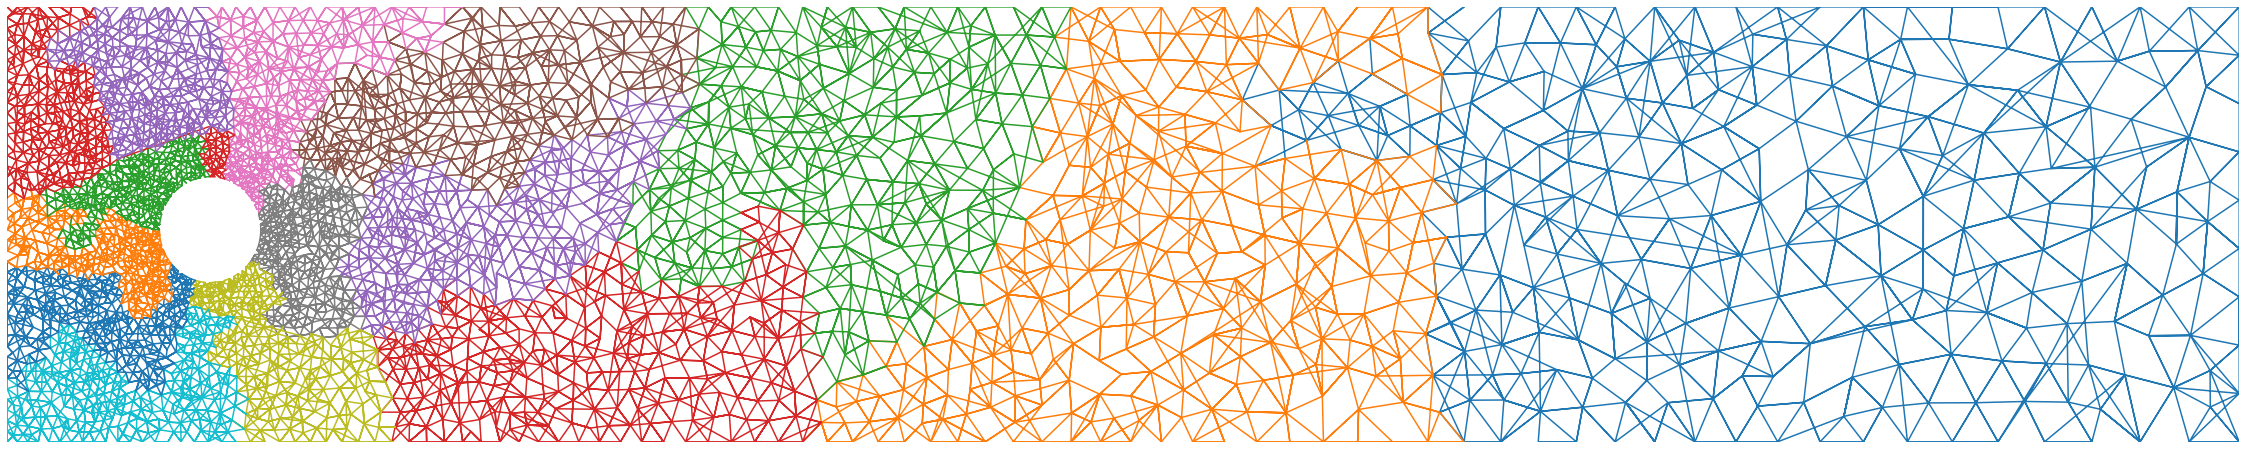

In [8]:
#visualize the space-filling curve, only works for the FPC example
plot_trace_vtu_2D(coords[space_filling_orderings[0]], 15)
# countour_plot_vtu_2D(coords[space_filling_orderings[0]], 15)

### Random split the tensor into training_set: valid_set: test_set = 0.8:0.1:0.1 = 8:1:1

In [267]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = full_tensor.shape[0])

In [268]:
train_set = full_tensor[train_index - 1]
valid_set = full_tensor[valid_index - 1]
test_set = full_tensor[test_index - 1]

In [242]:
# normalisation (sugguest not?)
# train_set, train_mean, train_std = normalize_tensor(train_set)
# valid_set, valid_mean, valid_std = normalize_tensor(valid_set)
# test_set, test_mean, test_std = normalize_tensor(test_set)

In [274]:
# standardlisation, which linearly maps the dataset to [lower, upper], 
# may be use lower = -1, upper = 1 if using Tanh() as activation.
train_set, train_k, train_b = standardlize_tensor(train_set, lower = 0, upper = 1)
valid_set, valid_k, valid_b = standardlize_tensor(valid_set, lower = 0, upper = 1)
test_set, test_k, test_b = standardlize_tensor(test_set, lower = 0, upper = 1)

### The following cell is quite vital, as it indicates the parameters for the **autoencoder**

`input_size` is the number of Node, for example 20550 <br> `dimension` is the dimension of the data in Vtu file, 2 or 3.<br> `components` is the number of components you are compressing, if the tensor is 2 dimension, then it's default of 1. `self_concat` is chennel copying operation, you could keep it default as 1, or 2 when you have multiple SFCs. <br> `structured`: bool, whether you are training SFC-CAE on a structured mesh or not.<br>`nearest_neighboring`: bool, adding sparse layers or not, suggest to turn on.<br>
`dims_letent`: The dimension of the compressed data after applying decoder. <br>
`space_filling_orderings`, `invert_space_filling_orderings` : lists of sfc\inverse_sfc nums, generated by `get_sfc_curves_from_coords` function, or read the orderings from a `csv` file on your own. <br>
`activation`: Can be customly defined, but if you not spcify, the activation would be `ReLU()` for structured mesh, and `Tanh()` for unstructured mesh.

In [249]:
input_size = train_set.shape[1]
dimension = 2
if train_set.ndim == 2: components = 1
else: components = train_set.shape[-1]
self_concat = 1
structured = False
nearest_neighbouring = False # shut down this may lead to a slightly poorer performance, but a quicker training spped
dims_latent = 32
activation = nn.ReLU()
# space_filling_orderings = (mannully spcify it if you didn't generate in the cells before)
# invert_space_filling_orderings = 

In [250]:
autoencoder = SFC_CAE(input_size,
                      dimension,
                      components,
                      structured,
                      self_concat,
                      nearest_neighbouring,
                      dims_latent,
                      space_filling_orderings, 
                      invert_space_filling_orderings,
                      activation)

### The following are just normal Hyperparameters for training, free to tune it yourself.

In [251]:
batch_size = 16
seed = 41
lr = 1e-3
n_epochs = 500
weight_decay = 0
criterion_type = 'MSE'
valid_batch_size = valid_set.shape[0]

In [252]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=valid_batch_size, shuffle=True)

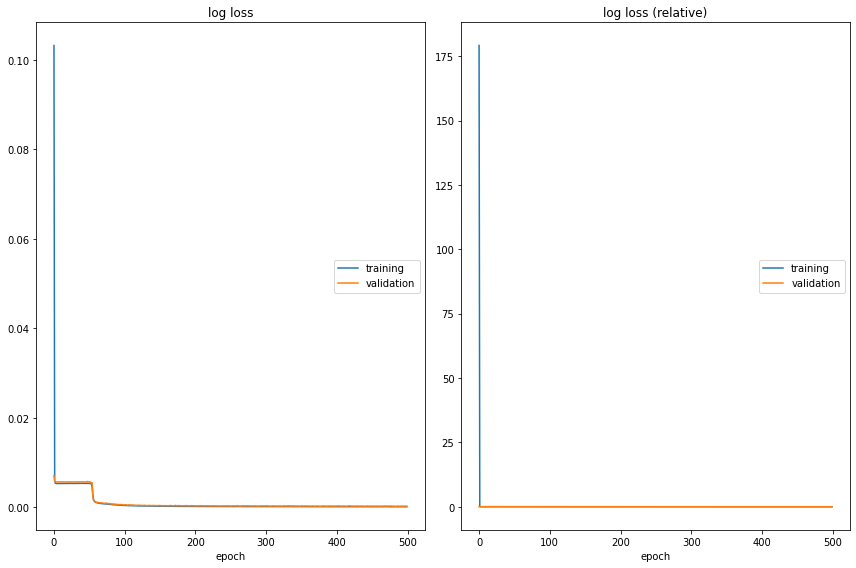

log loss
	training         	 (min:    0.000, max:    0.103, cur:    0.000)
	validation       	 (min:    0.000, max:    0.007, cur:    0.000)
log loss (relative)
	training         	 (min:    0.000, max:  179.193, cur:    0.000)
	validation       	 (min:    0.001, max:    0.021, cur:    0.001)
Epoch:  499 | train loss: 1.038836e-04 | valid loss: 2.323969e-04 
      	| train loss (relative): 3.052702e-04 | valid loss (relative): 6.806140e-04 
Epoch 499 use: 2.37 second.


In [253]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          n_epochs = n_epochs, 
                          lr = lr,
                          weight_decay = weight_decay,
                          criterion_type = criterion_type,
                          seed = seed)

In [275]:
test_reconstruct = autoencoder.to('cpu')(test_set)
print('test MSE loss: %e' % nn.MSELoss()(test_set, test_reconstruct).item())

test MSE loss: 2.271005e-04


### We convert the `test set` back to original magnitude:

In [276]:
test_set_origin = destandardlize_tensor(test_set, test_k, test_b)
test_reconstruct_origin = destandardlize_tensor(test_reconstruct, test_k, test_b)

In [277]:
print('test MSE loss on the original magnitude: %e' % nn.MSELoss()(test_set_origin, test_reconstruct_origin).item())

test MSE loss on the original magnitude: 4.870820e-06


### Apply the autoencoder to the full dataset

In [293]:
full_set, full_k, full_b = standardlize_tensor(full_tensor, lower = 0, upper = 1)
full_reconstruct = autoencoder.to('cpu')(full_set)

In [294]:
full_reconstruct_origin = destandardlize_tensor(full_reconstruct, full_k, full_b)
full_tensor = destandardlize_tensor(full_set, full_k, full_b)
print('MSE loss for the whole dataset on the original magnitude: %e' % nn.MSELoss()(full_tensor, full_reconstruct_origin).item())

MSE loss for the whole dataset on the original magnitude: 2.712496e-06


### Other functions need to be add, like convert the result back to `csv`/`vtu` files.....

In [422]:
# added functions to output vtu files from reconstruct
!mkdir -p ../reconstructed
# the start components for field, remember we have 2 for velocity, for example
# if you read in 2 componenets for velocity and then 1 component for mass, 
# you should specify [0, 1, full_tensor.shape[-1]] here.
field_spliters = [0, full_tensor.shape[-1]]
result_to_vtu_unadapted(data_path, coords, cells, full_reconstruct_origin, vtu_fields, field_spliters)

  0% (3 of 2000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:15

file_prefix: FPC_Re3900_DG_new/fpc_, file_format: .vtu
Write vtu Data......



100% (2000 of 2000) |####################| Elapsed Time: 0:01:12 Time:  0:01:12



 Finished writing vtu files.
